In [1]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
# load the datasets
customer_df = pd.read_csv('customer_data.csv')
sales_df = pd.read_csv('sales_data.csv')

In [3]:
# inspecting the first few rows
print("Customer Data Head:")
print(customer_df.head())

print("\nSales Data Head:")
print(sales_df.head())

Customer Data Head:
  customer_id  gender   age payment_method
0     C241288  Female  28.0    Credit Card
1     C111565    Male  21.0     Debit Card
2     C266599    Male  20.0           Cash
3     C988172  Female  66.0    Credit Card
4     C189076  Female  53.0           Cash

Sales Data Head:
  invoice_no customer_id  category  quantity    price invoice_date  \
0    I138884     C241288  Clothing         5  1500.40   05-08-2022   
1    I317333     C111565     Shoes         3  1800.51   12-12-2021   
2    I127801     C266599  Clothing         1   300.08   09-11-2021   
3    I173702     C988172     Shoes         5  3000.85   16-05-2021   
4    I337046     C189076     Books         4    60.60   24-10-2021   

    shopping_mall  
0          Kanyon  
1  Forum Istanbul  
2       Metrocity  
3    Metropol AVM  
4          Kanyon  


In [4]:
# inspect info of datasets
print("\nCustomer Data Info:")
print(customer_df.info())

print("\nSales Data Info:")
print(sales_df.info())


Customer Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     99457 non-null  object 
 1   gender          99457 non-null  object 
 2   age             99338 non-null  float64
 3   payment_method  99457 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.0+ MB
None

Sales Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   invoice_no     99457 non-null  object 
 1   customer_id    99457 non-null  object 
 2   category       99457 non-null  object 
 3   quantity       99457 non-null  int64  
 4   price          99457 non-null  float64
 5   invoice_date   99457 non-null  object 
 6   shopping_mall  99457 non-null  object 
dtypes: float64(1), in

In [5]:
# merge datasets for better analysis
merged_df = pd.merge(sales_df, customer_df, on='customer_id', how='left')

# handle missing values
merged_df = merged_df.dropna(subset=['age'])

# convert 'invoice_date' to datetime objects
merged_df['invoice_date'] = pd.to_datetime(merged_df['invoice_date'], format='%d-%m-%Y')

# the 'price' column represents the transaction amount so we can rename it to 'total_sales' to be clear.
merged_df = merged_df.rename(columns={'price': 'total_sales'})

In [6]:
# checking the cleaned dataframe
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99338 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99338 non-null  object        
 1   customer_id     99338 non-null  object        
 2   category        99338 non-null  object        
 3   quantity        99338 non-null  int64         
 4   total_sales     99338 non-null  float64       
 5   invoice_date    99338 non-null  datetime64[ns]
 6   shopping_mall   99338 non-null  object        
 7   gender          99338 non-null  object        
 8   age             99338 non-null  float64       
 9   payment_method  99338 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 8.3+ MB


In [7]:
# extracting Year and Month
merged_df['year'] = merged_df['invoice_date'].dt.year
merged_df['month'] = merged_df['invoice_date'].dt.month_name()
merged_df['month_num'] = merged_df['invoice_date'].dt.month

# creating age groups as bins of [18-30, 31-45, 46-60, 60+] for demographic analysis
bins = [18, 30, 45, 60, 100]
labels = ['Young Adult', 'Adult', 'Middle Aged', 'Senior']
merged_df['age_group'] = pd.cut(merged_df['age'], bins=bins, labels=labels)

print(merged_df[['invoice_date', 'year', 'month', 'age', 'age_group']].head())

  invoice_date  year     month   age    age_group
0   2022-08-05  2022    August  28.0  Young Adult
1   2021-12-12  2021  December  21.0  Young Adult
2   2021-11-09  2021  November  20.0  Young Adult
3   2021-05-16  2021       May  66.0       Senior
4   2021-10-24  2021   October  53.0  Middle Aged


In [8]:
# Now we can analyse the data properly

# analysing top 10 Customers by Total Spending
top_customers = merged_df.groupby('customer_id')['total_sales'].sum().sort_values(ascending=False).head(10)

In [9]:
# analysing sales by category
category_sales = merged_df.groupby('category')['total_sales'].sum().sort_values(ascending=False)

In [10]:
# analysing sales by gender
gender_sales = merged_df.groupby('gender')['total_sales'].sum()

In [11]:
# analysing sales by shopping mall
mall_sales = merged_df.groupby('shopping_mall')['total_sales'].sum().sort_values(ascending=False)

In [12]:
#we can get a short summary of what we actually found a moments ago
print("--- Top 10 High-Value Customers ---")
print(top_customers)

print("\n--- Sales by Category ---")
print(category_sales)

--- Top 10 High-Value Customers ---
customer_id
C255975    5250.0
C188622    5250.0
C323204    5250.0
C919623    5250.0
C279869    5250.0
C142240    5250.0
C287416    5250.0
C151242    5250.0
C110428    5250.0
C268769    5250.0
Name: total_sales, dtype: float64

--- Sales by Category ---
category
Clothing           31039074.88
Shoes              18099926.86
Technology         15769950.00
Cosmetics           1847061.82
Toys                1085199.36
Food & Beverage      231333.36
Books                226719.75
Souvenir             174108.39
Name: total_sales, dtype: float64


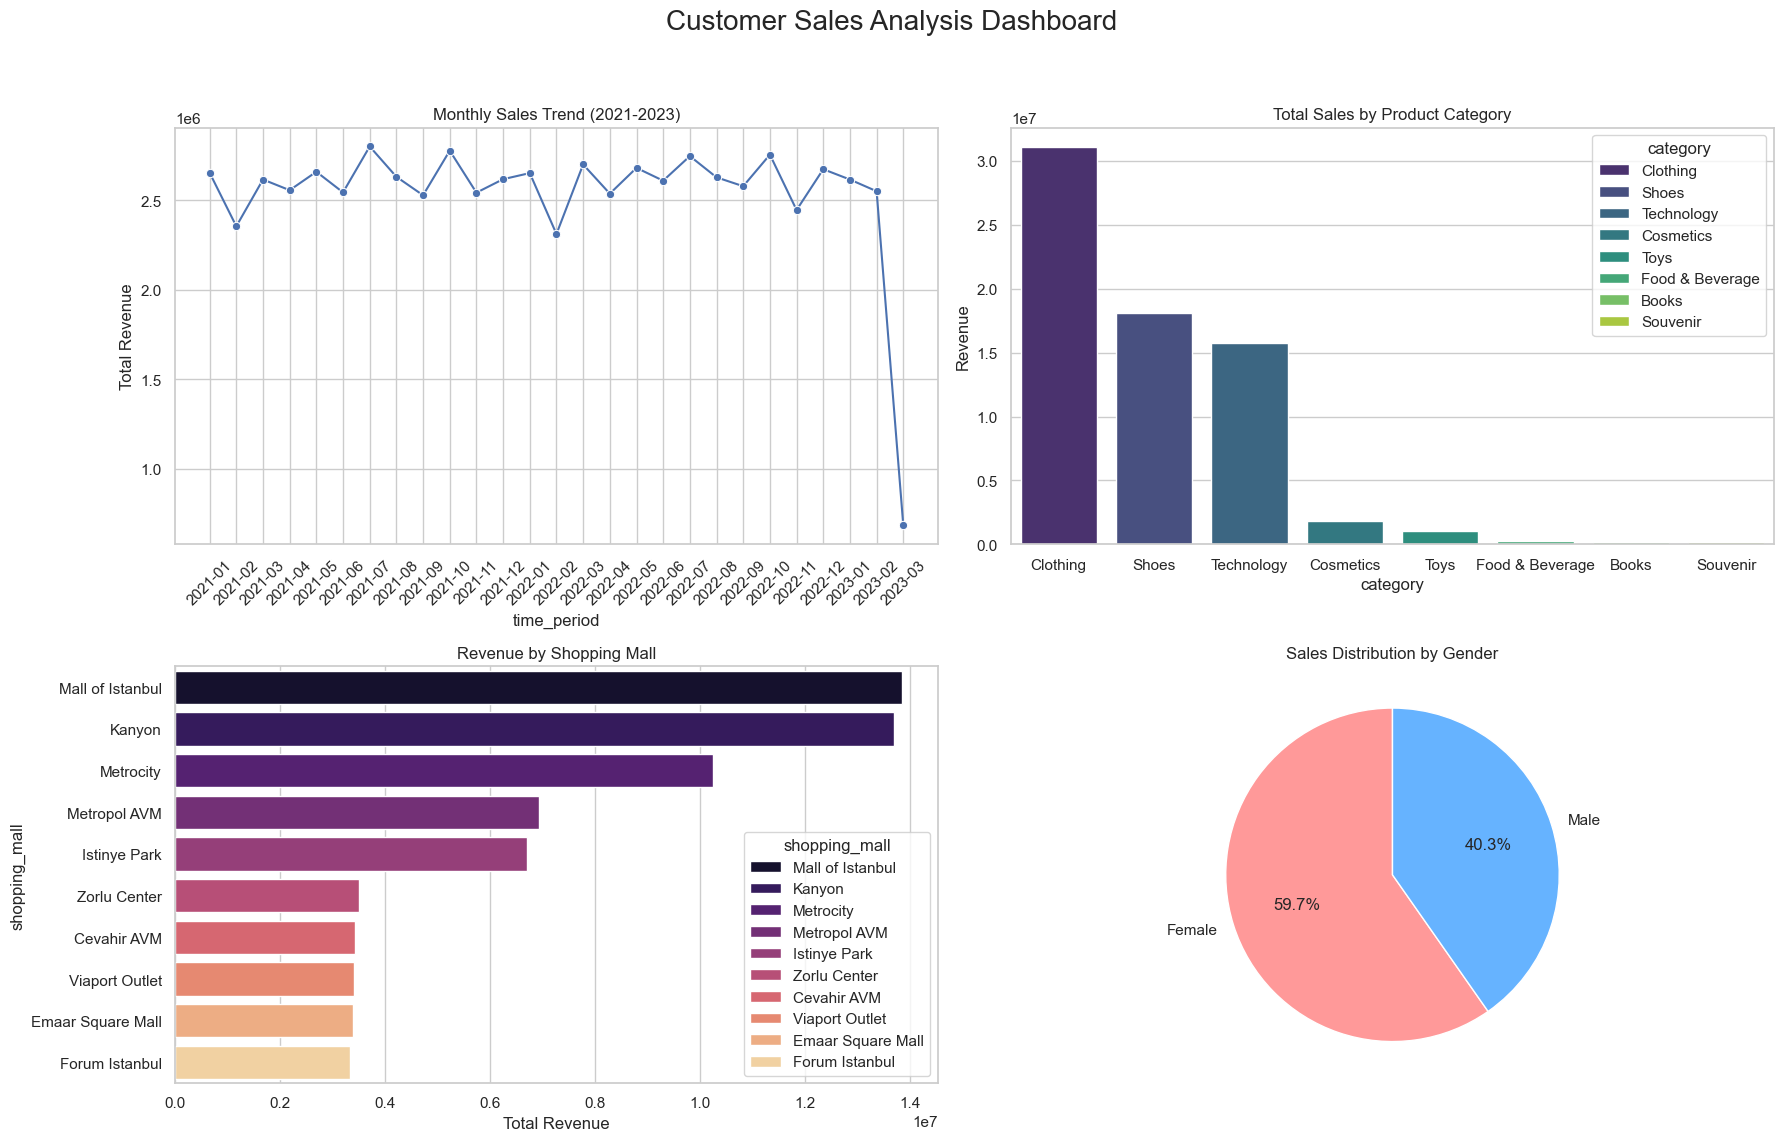

In [13]:
# creating a dashboard is tricky but not impossible
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Customer Sales Analysis Dashboard', fontsize=20)

# monthly Sales Trend (Line Chart) grouped by Year-Month to see the timeline
monthly_trend = merged_df.groupby(['year', 'month_num'])['total_sales'].sum().reset_index()
monthly_trend['time_period'] = monthly_trend['year'].astype(str) + "-" + monthly_trend['month_num'].astype(str).str.zfill(2)

sns.lineplot(ax=axes[0, 0], data=monthly_trend, x='time_period', y='total_sales', marker='o', color='b')
axes[0, 0].set_title('Monthly Sales Trend (2021-2023)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_ylabel('Total Revenue')

# a bar chart to visualise Sales by Category
sns.barplot(ax=axes[0, 1], x=category_sales.index, y=category_sales.values,hue=category_sales.index, legend=True, palette='viridis')
axes[0, 1].set_title('Total Sales by Product Category')
axes[0, 1].set_ylabel('Revenue')

# another bar chart (horizontal) to visualise Top Shopping Malls
sns.barplot(ax=axes[1, 0], x=mall_sales.values, y=mall_sales.index, hue=mall_sales.index, legend=True, palette='magma')
axes[1, 0].set_title('Revenue by Shopping Mall')
axes[1, 0].set_xlabel('Total Revenue')

# a pie chart to showcase customer gender distribution
axes[1, 1].pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)
axes[1, 1].set_title('Sales Distribution by Gender')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()